# QUESTION: ⁠How do job satisfaction, work-life balance, distance from home, job involvement, and overtime influence employee attrition in medium-sized organizations (50-250 employees)?


**Table of contents**<a id='toc0_' numbering=true></a><a id='toc0_'></a>    
- 1. [Executive Summary](#toc1_)    
- 2. [Introduction](#toc2_)    
    - 2.1.1. [Understand variables and potential data cleaning](#toc2_1_1_)    
- 3. [Exploratory Data Analysis](#toc3_)    
  - 3.1. [Descriptive Statistics of Individual Variables](#toc3_1_)    
    - 3.1.1. [Descriptive Statistics of Nominal Variables](#toc3_1_1_)    
    - 3.1.2. [Descriptive Statistics of Continious Variables](#toc3_1_2_)    
  - 3.2. [Descriptive Statistics of Correlations](#toc3_2_)    
- 4. [What factors influences churn of telecome customers in the United States?](#toc4_)    
  - 4.1. [Two sample t-test - One-sided](#toc4_1_)    
  - 4.2. [Logistic Regression](#toc4_2_)    
    - 4.2.1. [Model-based t-test and EDA](#toc4_2_1_)    
    - 4.2.2. [Model Lasslo L1 Regularization](#toc4_2_2_)    
    - 4.2.3. [Interpreting the Outcome](#toc4_2_3_)    
      - 4.2.3.1. [R Squared (Goodness-of-fit)](#toc4_2_3_1_)    
      - 4.2.3.2. [Confusion Matrix and Accuaracy (Goodness-of-fit)](#toc4_2_3_2_)    
      - 4.2.3.3. [Odds Ratio](#toc4_2_3_3_)    
- 5. [What factors influence the account length of churned telecome customer in the United States?](#toc5_)    
  - 5.1. [Linear Regression](#toc5_1_)    
    - 5.1.1. [Model](#toc5_1_1_)    
    - 5.1.2. [Assumptions Checking](#toc5_1_2_)    
      - 5.1.2.1. [Linearity](#toc5_1_2_1_)    
      - 5.1.2.2. [Homoscedacsity](#toc5_1_2_2_)    
      - 5.1.2.3. [Normality of Residuals](#toc5_1_2_3_)    
      - 5.1.2.4. [Multicollinearity](#toc5_1_2_4_)    
      - 5.1.2.5. [Independence of Errors (autocorrelation of errors)](#toc5_1_2_5_)    
- 6. [Conclusion](#toc6_)

# 1. <a id='toc1_'></a>[Executive Summary](#toc0_)

**Project Goal** bla bla bla

**Key Findings** bla bla bla

# 2. <a id='toc2_'></a>[Introduction](#toc0_)

In the following, we will use the **dataset "HR-Data"** from -, _ (Source: [link](link)). bla bla:

- `Age`: The employee’s age.  
- `Attrition`: Whether the employee has left the company (Yes/No).  
- `BusinessTravel`: Frequency of business travel (e.g., Rarely, Frequently, None).  
- `DailyRate`: Daily rate of pay.  
- `Department`: The department where the employee works (e.g., Sales, HR, R&D).  
- `DistanceFromHome`: Distance between home and workplace (in kilometers).  
- `Education`: Level of education (e.g., High School, Bachelor, Master).  
- `EducationField`: Field of education (e.g., Life Sciences, Engineering).  
- `EmployeeCount`: Number of employees (often a constant in some datasets).  
- `EmployeeNumber`: Unique identifier for the employee.  
- `EnvironmentSatisfaction`: Satisfaction with the work environment (scale).  
- `Gender`: Gender of the employee.  
- `HourlyRate`: Hourly rate of pay.  
- `JobInvolvement`: Level of job involvement (scale).  
- `JobLevel`: Job level or position level.  
- `JobRole`: Job role (e.g., Sales Executive, Research Scientist).  
- `JobSatisfaction`: Satisfaction with the job (scale).  
- `MaritalStatus`: Marital status (e.g., Single, Married).  
- `MonthlyIncome`: Monthly income.  
- `MonthlyRate`: Monthly rate of pay (payroll rate).  
- `NumCompaniesWorked`: Number of previous companies the employee has worked at.  
- `Over18`: Whether the employee is over 18 years old (often a constant).  
- `OverTime`: Whether the employee works overtime (Yes/No).  
- `PercentSalaryHike`: Percentage salary increase.  
- `PerformanceRating`: Performance rating (scale).  
- `RelationshipSatisfaction`: Satisfaction with workplace relationships (scale).  
- `StandardHours`: Standard working hours (often a constant, e.g., 40 hours/week).  
- `StockOptionLevel`: Stock option level.  
- `TotalWorkingYears`: Total years of professional experience.  
- `TrainingTimesLastYear`: Number of training sessions attended last year.  
- `WorkLifeBalance`: Satisfaction with work–life balance (scale).  
- `YearsAtCompany`: Number of years at the current company.  
- `YearsInCurrentRole`: Number of years in the current role.  
- `YearsSinceLastPromotion`: Number of years since the last promotion.  
- `YearsWithCurrManager`: Number of years with the current manager.  


**Research Questions & Hypotheses**
bla bla

1. **Question** bla bla bla

**T-test Hypotheses**:
    
bla bla

**Logistic Regression Hypotheses**:

   bla bla

    


Importing all neccessary libaries and packages

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns


### 2.1.1. <a id='toc2_1_1_'></a>[Understand variables and potential data cleaning](#toc0_)
- WEWRIGHT: Understand dataset structure, check missing values, understand variable types
- FIXME: Check unique values and convert binominal values to 0 and 1

In [15]:
csv_data = pd.read_csv('HR-Employee-Attrition.csv')

# Showing dataset
csv_data.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8


REWRITE: General information about the dataset, number of missing values and variable types.

In [16]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

WEWRITE1. Dataset has `20` attributes and `3,333` rows.
2. There are no missing values which `non-null` indicates.
3. The different `types`of variables are shown in the last column
4. The variable names are not following best practice in coding hence we rename the variable

In [17]:
# Checking missing values again
if csv_data.isnull().sum().sum()==0:
    print('There are no missing values')
else:
    print('There are missing values')

There are no missing values


There are no missing values

Checking unique values for all nominal variables

In [18]:
# Find unique values of all nominal variables
nominal_variables = ['Attrition']

for column in nominal_variables:
    print(f"There are following unique values in '{column}' column:\n {csv_data[column].unique()}\n")

There are following unique values in 'Attrition' column:
 ['Yes' 'No']



FIXME: WEWRITE


Next we will convert the binominal values to `0` and `1`, to be coherent

In [19]:
csv_data['Attrition'] = csv_data['Attrition'].map({'No': 0, 'Yes': 1})
csv_data['OverTime'] = csv_data['OverTime'].map({'No': 0, 'Yes': 1})
csv_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 3. <a id='toc3_'></a>[Exploratory Data Analysis](#toc0_)

## 3.1. <a id='toc3_1_'></a>[Descriptive Statistics of Individual Variables](#toc0_)

### 3.1.1. <a id='toc3_1_1_'></a>[Descriptive Statistics of Nominal Variables](#toc0_)

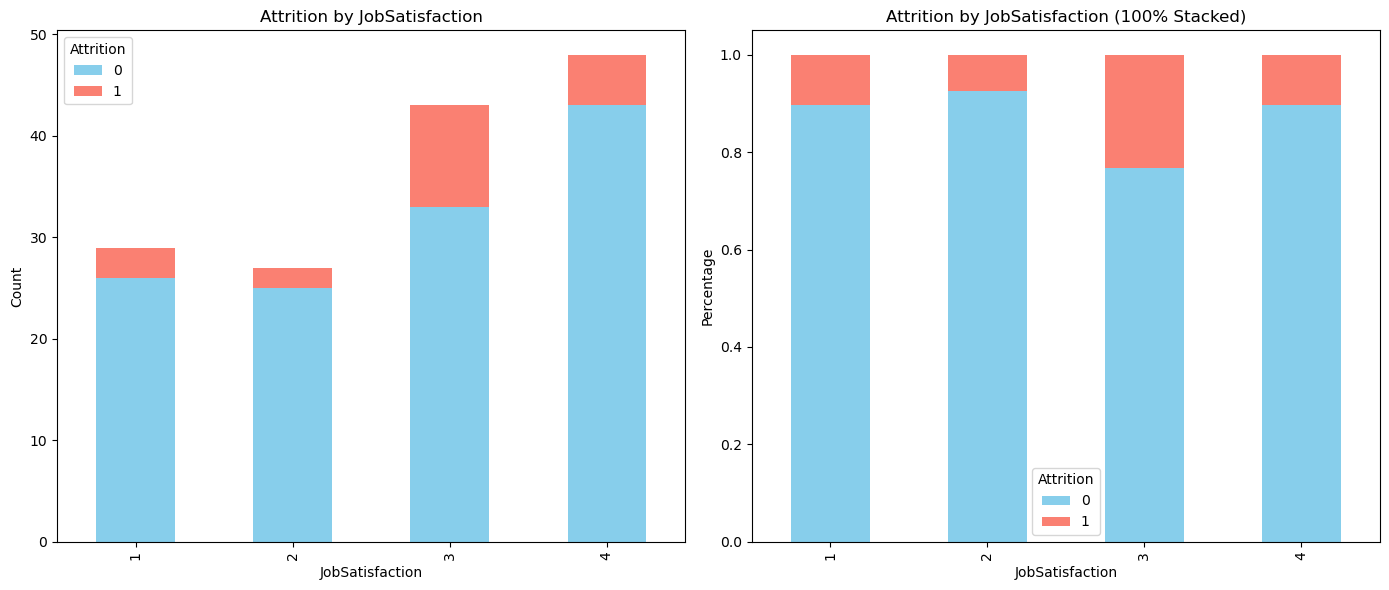

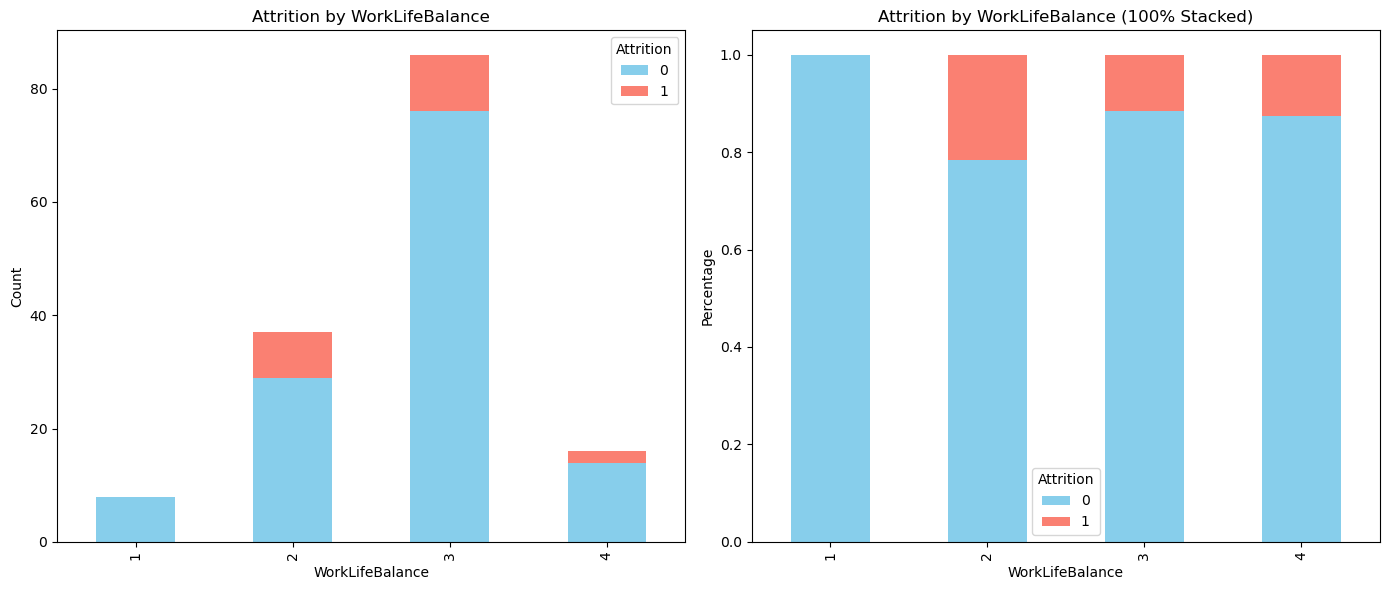

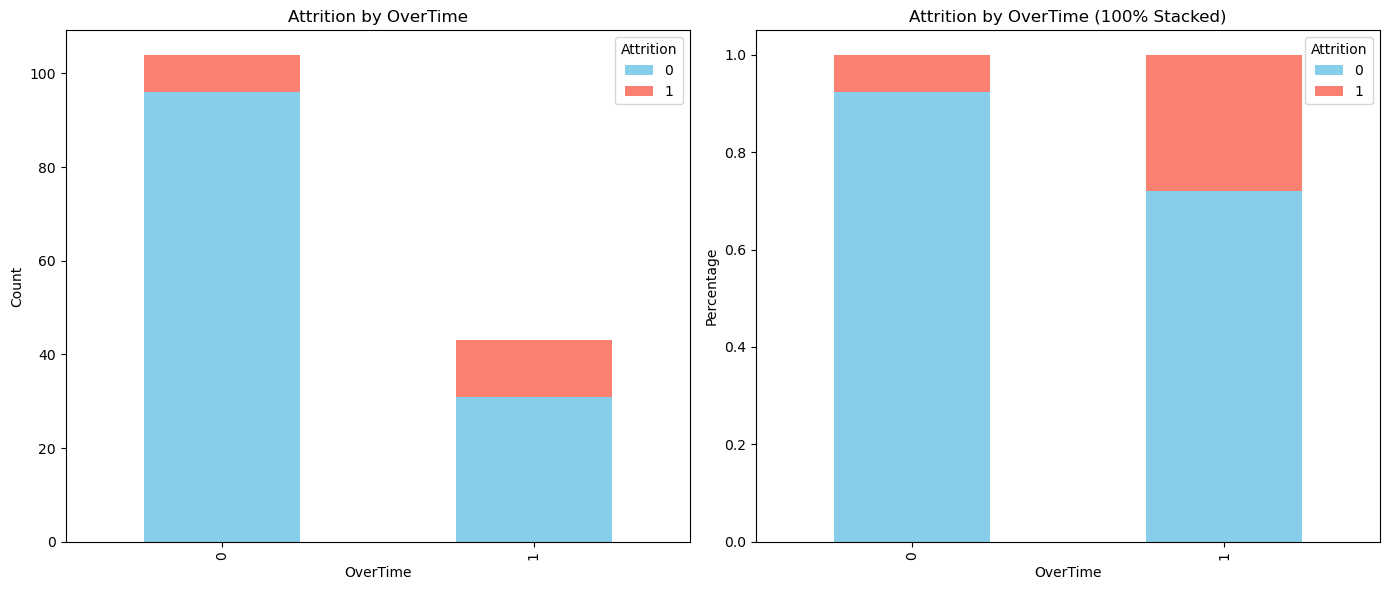

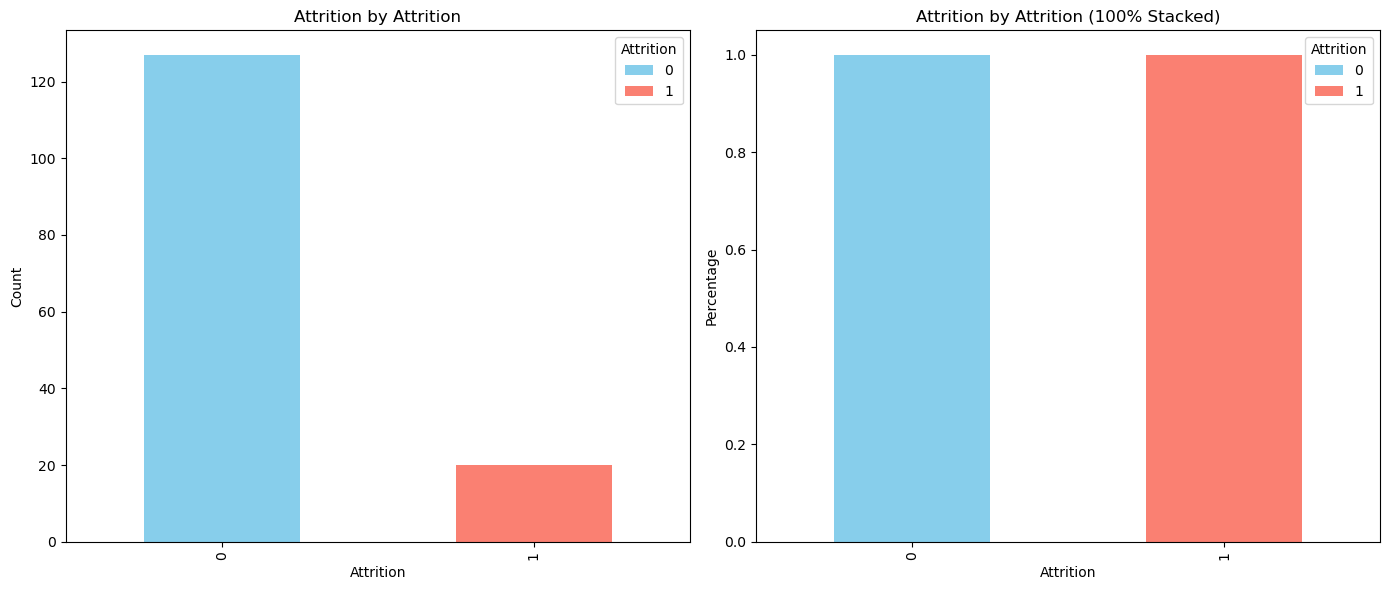

In [32]:
# REWRITE: Stacked bar graphs for churn counts by area code, voice mail plan, international plan, state and state region
def bar_grouped_by_attrition(independent_variable):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    filtered_data = csv_data[(csv_data['EmployeeNumber'] >= 50) & (csv_data['EmployeeNumber'] <= 250)]
    
    attrition_variable = filtered_data.groupby([independent_variable, 'Attrition']).size().unstack()
    attrition_variable.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'salmon'])
    axes[0].set_title(f'Attrition by {independent_variable}')
    axes[0].set_xlabel(f'{independent_variable}')
    axes[0].set_ylabel('Count')
    axes[0].legend(title='Attrition')
    
    attrition_variable_pct = attrition_variable.div(attrition_variable.sum(axis=1), axis=0)
    attrition_variable_pct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[1])
    axes[1].set_title(f'Attrition by {independent_variable} (100% Stacked)')
    axes[1].set_xlabel(f'{independent_variable}')
    axes[1].set_ylabel('Percentage')
    axes[1].legend(title='Attrition')
    
    plt.tight_layout()
    plt.show()

for i in ['JobSatisfaction', 'WorkLifeBalance', 'OverTime', 'Attrition']:
    bar_grouped_by_attrition(i)

### 3.1.2. <a id='toc3_1_2_'></a>[Descriptive Statistics of Continious Variables](#toc0_)

In [33]:
# Calculate summary statistics
summary_stats = csv_data.describe().T[['count', 'mean','50%','std', 'min', 'max', '25%', '75%',]]

# Rename the columns for clarity
summary_stats.columns = ['N', 'Mean', 'Median', 'S.D.','Min','Max','25th Quantile', '75th Quantile']

# Print the summary table
summary_stats = np.round(summary_stats, 2)
summary_stats

,N,Mean,Median,S.D.,Min,Max,25th Quantile,75th Quantile
Age,1470.0,36.92,36.0,9.14,18.0,60.0,30.00,43.00
Attrition,1470.0,0.16,0.0,0.37,0.0,1.0,0.00,0.00
DailyRate,1470.0,802.49,802.0,403.51,102.0,1499.0,465.00,1157.00
DistanceFromHome,1470.0,9.19,7.0,8.11,1.0,29.0,2.00,14.00
Education,1470.0,2.91,3.0,1.02,1.0,5.0,2.00,4.00
EmployeeCount,1470.0,1.00,1.0,0.00,1.0,1.0,1.00,1.00
EmployeeNumber,1470.0,1024.87,1020.5,602.02,1.0,2068.0,491.25,1555.75
EnvironmentSatisfaction,1470.0,2.72,3.0,1.09,1.0,4.0,2.00,4.00
HourlyRate,1470.0,65.89,66.0,20.33,30.0,100.0,48.00,83.75
JobInvolvement,1470.0,2.73,3.0,0.71,1.0,4.0,2.00,3.00


**Interpretation** 

bla bla bla

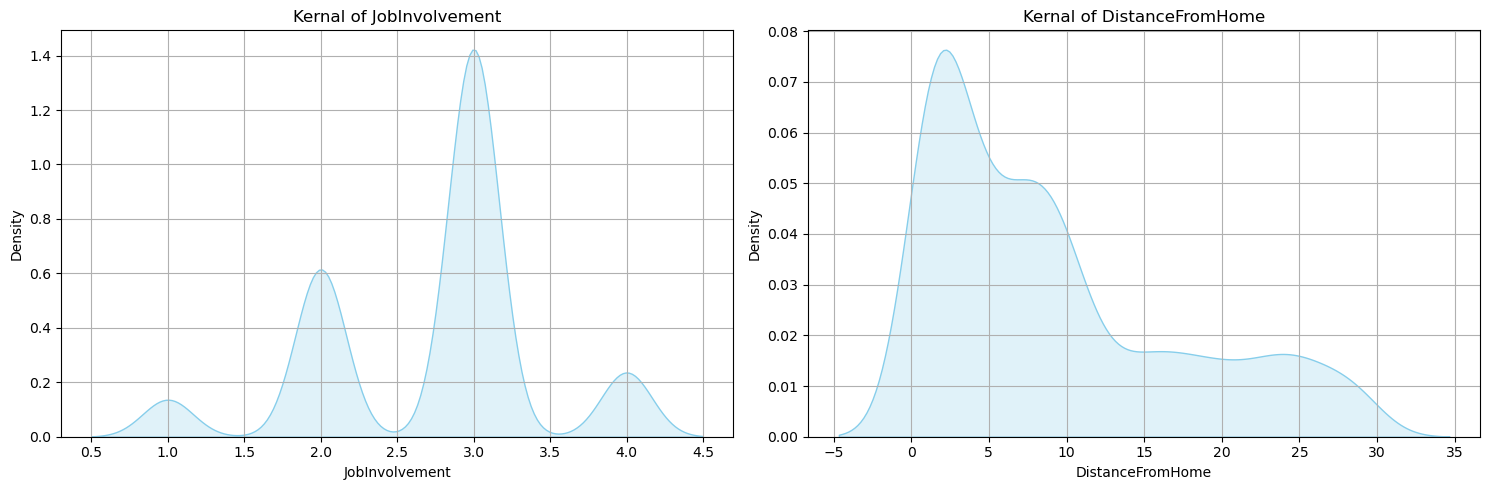

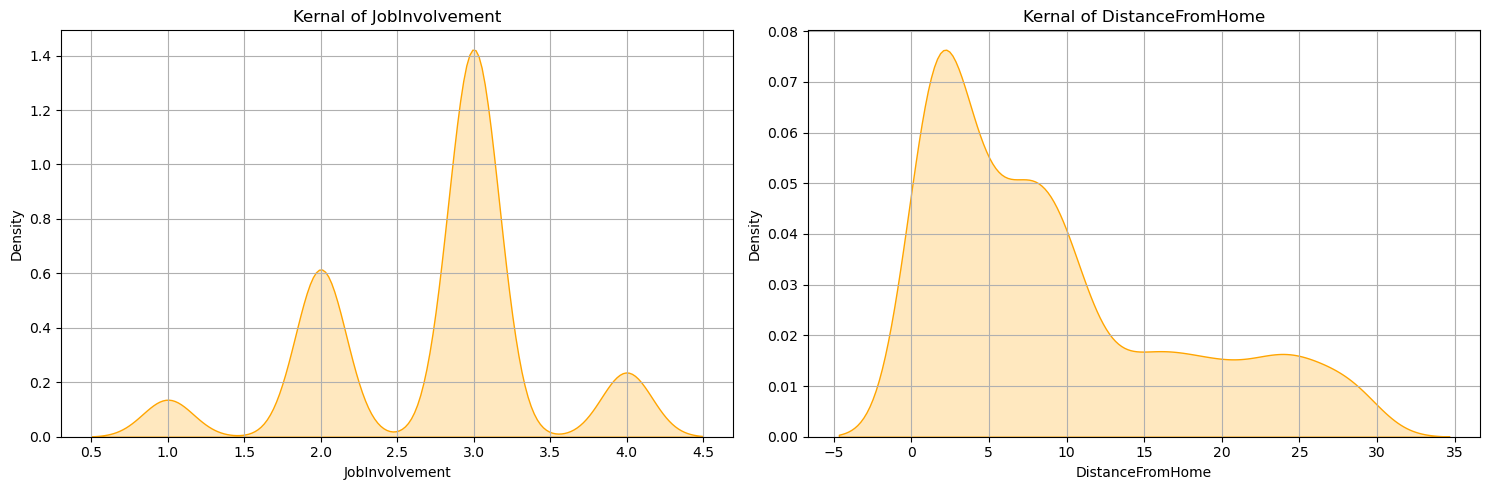

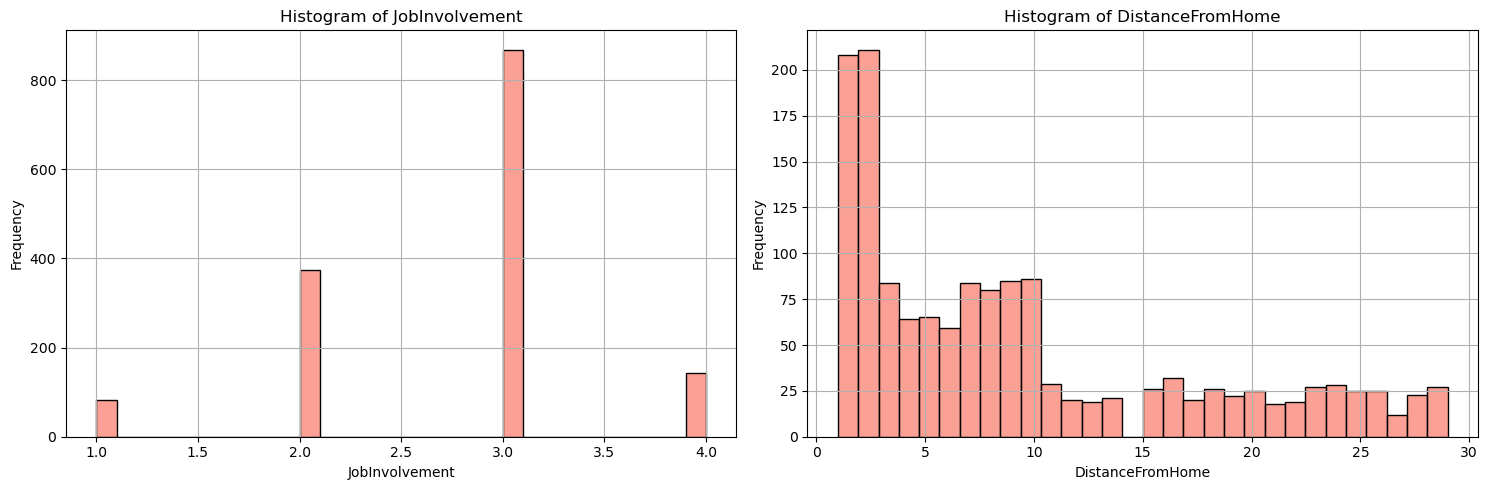

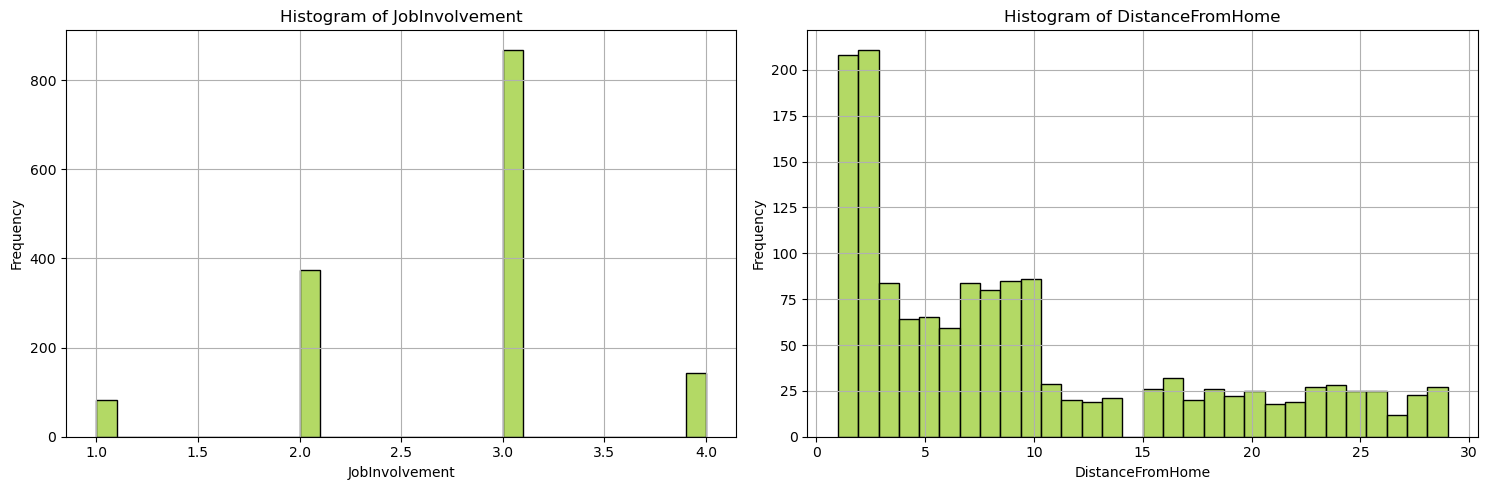

In [34]:
# Define method for ploting histograms for ordinal variables to understand their distribution
def ploting_histogram(list_of_variables, color):
    fig, axes = plt.subplots(1, len(list_of_variables), figsize=(15, 5))
    for i in range(len(list_of_variables)):
        sns.histplot(csv_data[list_of_variables[i]], bins=30, kde=False, color=color, ax=axes[i])
        axes[i].set_title('Histogram of ' + list_of_variables[i])
        axes[i].set_xlabel(list_of_variables[i])
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

# Define method for ploting kernal for continous variables to understand their distribution
def ploting_kernal(list_of_variables, color):
    fig, axes = plt.subplots(1, len(list_of_variables), figsize=(15, 5))
    for i in range(len(list_of_variables)):
        sns.kdeplot(csv_data[list_of_variables[i]], fill=True, color=color, ax=axes[i])
        axes[i].set_title('Kernal of ' + list_of_variables[i])
        axes[i].set_xlabel(list_of_variables[i])
        axes[i].set_ylabel('Density')
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

ploting_kernal(['JobInvolvement', 'DistanceFromHome'],'skyblue')
ploting_kernal(['JobInvolvement', 'DistanceFromHome'],'orange')
ploting_histogram(['JobInvolvement', 'DistanceFromHome'],'salmon')
ploting_histogram(['JobInvolvement', 'DistanceFromHome'],'yellowgreen')

### 110.1.1. <a id='toc3_1_1_'></a>[Just testing](#toc0_)

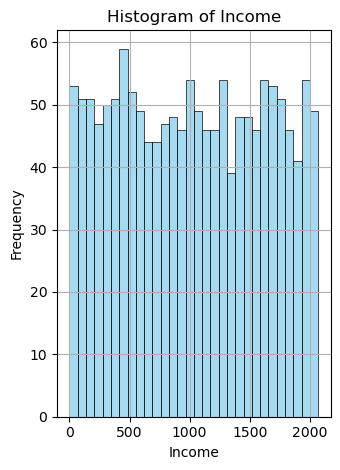

In [ ]:


plt.subplot(1, 2, 1)
sns.histplot(csv_data['EmployeeNumber'], bins=30, kde=False, color='skyblue')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()